# **Social Bytes and Wellness**
This project aims to analyze social media affects on mental health


In this project i have used a dataset from Kaggle:
> - [Social Media and Mental Health Dataset](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8627992/)

## **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## **Step 2: Reading + Exploring Data**

In [2]:
data = pd.read_excel('mmc2.xlsx')

In [3]:
data.head()

,Timestamp,"1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)",2. Which social media account do you use usually?,3. Which device do you usually use to connect social media?,4. Which type of internet connection do you use?,5. How long have you been using a social media account?,6. How frequently do you post (upload status or add photos/videos) on social media?,7. How much time do you spend daily in social media?,8. When do you usually use social media?,9. How many friends do you have on social media?,...,"10. In last 30 days, How many times, I cough or snore loudly?","11. In last 30 days, How many times, I feel too cold?","12. In last 30 days, How many times, I feel too hot?","13. In last 30 days, How many times, I saw bad dreams?","14. In last 30 days, How many times, I have pain during sleep?","15. In last 30 days, How many times, I having trouble sleeping for any other reason?","16. In last 30 days, In last month, have you take medicines for sleep?","17. In last month, how many times you cannot sleep due to any program or other important case?","18. In last month, how many times you face problems to maintain program or other important case?","19. During the past month, how would you rate your sleep quality overall?"
0,2021-02-20 21:56:49.755,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,1-3 hours,Frequently at anytime,Less than 500,...,Not during last month,Less then once a week,Not during last month,Not during last month,Not during last month,Less then once a week,Not during last month,Less then once a week,Less then once a week,Farely good
1,2021-02-20 23:32:52.030,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,3-5 per day,More than 5 hours,Frequently at anytime,500-2000,...,Less then once a week,Less then once a week,Three or more in week,Less then once a week,Not during last month,Not during last month,Less then once a week,Less then once a week,Less then once a week,Very bad
2,2021-02-16 21:03:59.071,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,3-5 hours,Night to late night,Less than 500,...,Not during last month,Not during last month,Less then once a week,Less then once a week,Three or more in week,Three or more in week,Not during last month,Three or more in week,Once or twice a week,Very bad
3,2021-03-01 10:03:23.049,Yes,Twitter,Mobile Phone,Mobile data,Less than 2-year,Less than 1 per day,3-5 hours,Frequently at anytime,500-2000,...,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Not during last month,Farely good
4,2021-02-27 19:27:54.278,Yes,Twitter,Mobile Phone,Broadband (Wi-Fi),Less than 2-year,More than 5 per day,More than 5 hours,Night to late night,2000-4000,...,Not during last month,Not during last month,Not during last month,Not during last month,Less then once a week,Less then once a week,Less then once a week,Less then once a week,Less then once a week,Farely good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 76 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                                  --------------  -----         
 0   Timestamp                                                                                                               791 non-null    datetime64[ns]
 1   1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)                                                  791 non-null    object        
 2   2. Which social media account do you use usually?                                                                       791 non-null    object        
 3   3. Which device do you usually use to connect social media?                                                   

## **Step 3: Cleaning + Preprocessing**



In [5]:
# Simplify column names
data.rename(columns={
    'Timestamp': 'Timestamp',
    '1. Do you have a social media account? (e.g., Facebook, Twitter, etc.)': 'Social Media Account',
    '2. Which social media account do you use usually?': 'Preferred Social Media',
    '3. Which device do you usually use to connect social media?': 'Device Used for Social Media',
    '4. Which type of internet connection do you use?': 'Internet Connection Type',
    '5. How long have you been using a social media account?': 'Years on Social Media',
    '6. How frequently do you post (upload status or add photos/videos) on social media? ': 'Post Frequency',
    '7. How much time do you spend daily in social media?': 'Daily Social Media Time',
    '8. When do you usually use social media?': 'Preferred Social Media Time',
    '9. How many friends do you have on social media?': 'Number of Friends on Social Media',
    '10. How many friends do you know personally in social media? ': 'Number of Personally Known Friends on Social Media',
    '11. How many groups you are tagged in social media?': 'Number of Tagged Groups on Social Media',
    '12. What is your main purpose for using social media (e.g. Facebook)?': 'Main Purpose of Social Media Usage',
    '13. What contents do you mainly look for in your social media news feed?': 'Preferred Social Media Content',
    '14.Do you believe social media is a good thing?': 'Belief in Social Media',
    '15. When you see something in social media, do you instantly believe it?': 'Instant Belief in Social Media Posts',
    '16. Have you ever experienced peer pressure due to social media?': 'Peer Pressure Due to Social Media',
    '17. Does your emotion get influenced by other\'s posts (success, failure, loss)? ': 'Emotional Influence by Others\' Posts',
    '18. Have you ever compared yourself with other’s success or luxurious life?': 'Comparison with Others\' Success or Luxurious Life',
    '19. Do you think, your mental wellbeing would be better if you do not use social media?': 'Impact of Social Media on Mental Wellbeing',
    '20. If answer is yes, are you trying to control that thing and trying to reduce the use of social media?': 'Attempts to Control Social Media Usage',
    '21. Please write your age in years (number).': 'Age',
    '22. Gender': 'Gender',
    '23. Marital Status': 'Marital Status',
    '24. Religion': 'Religion',
    '25. Education': 'Education Level',
    '26. Profession': 'Profession',
    '27. Monthly income': 'Monthly Income',
    '28. Area of residence': 'Residence Area',
    '29. Living with-': 'Living Arrangement',
    '30. Body weight (Kg)': 'Body Weight',
    '31. Height (m)': 'Height',
    '32. Smoking habit': 'Smoking Habit',
    '1. In the past 30 days, do you feel lack of companionship?': 'Lack of Companionship (Last 30 Days)',
    '2. In the past 30 days, there is no one I can turn to': 'No One to Turn to (Last 30 Days)',
    '3. In the past 30 days, I feel left out.': 'Feeling Left Out (Last 30 Days)',
    '4. In the last 30 days, I feel isolated from others.': 'Feeling Isolated (Last 30 Days)',
    '5. In the last 30 days, I am unhappy being so withdrawn.': 'Unhappy Withdrawal (Last 30 Days)',
    '6. In the last 30 days, people are around me but not with me.': 'People Around But Not With Me (Last 30 Days)',
    '7. In the last 30 days, I am an outgoing person.': 'Outgoing Personality (Last 30 Days)',
    '8. In the last 30 days, I can find companionship when I want it.': 'Finding Companionship (Last 30 Days)',
    '1 In the last 30 days, little interest or pleasure in doing things.': 'Little Interest or Pleasure (Last 30 Days)',
    '2. In the last 30 days, feeling down, depressed or hopeless.': 'Feeling Down or Hopeless (Last 30 Days)',
    '3. In the last 30 days, trouble falling or staying asleep, sleeping too much': 'Sleep Troubles (Last 30 Days)',
    '4. In the last 30 days, Feeling tired or having little energy.': 'Fatigue (Last 30 Days)',
    '5. In the last 30 days, poor appetite or over-eating.': 'Appetite Changes (Last 30 Days)',
    '6. In the last 30 days, feeling bad about yourself-or that you are a failure or have let yourself or your family down.': 'Feeling Bad or Failure (Last 30 Days)',
    '7. In the last 30 days, trouble concentrating on things, such as reading the newspaper or watching television.': 'Concentration Troubles (Last 30 Days)',
    '8. In the last 30 days, moving or speaking so slowly or the opposite-moving around a lot more than usual.': 'Psychomotor Changes (Last 30 Days)',
    '9. In the last 30 days, thoughts that you would be better off dead, or of hurting yourself.': 'Suicidal Thoughts (Last 30 Days)',
    '1. In the last 30 days, I am feeling nervous, anxious, or on edge': 'Nervous or Anxious Feelings (Last 30 Days)',
    '2. In the last 30 days, I an not being able to stop or control worrying': 'Difficulty Controlling Worrying (Last 30 Days)',
    '3. In the last 30 days, I am worrying too much about different things.': 'Excessive Worrying (Last 30 Days)',
    '4. In the last 30 days, I felt trouble in relaxing.': 'Trouble Relaxing (Last 30 Days)',
    '5. In the last 30 days, I am being so restless that it\'s hard to sit still': 'Restlessness (Last 30 Days)',
    '6. In the last 30 days, I becoming easily annoyed or irritable.': 'Irritability (Last 30 Days)',
    '7. In the last 30 days, I am feeling afraid as if something awful might happen.': 'Fearful Feelings (Last 30 Days)',
    '1. When I am usually gone to bed?': 'Usual Bedtime',
    '2. How long (in minutes) has it taken you to fall asleep each night?': 'Sleep Onset Time',
    '3. When have you usually gotten up in the morning?': 'Usual Wake-Up Time',
    '4. How many hours of actual sleep do you get at night?': 'Hours of Sleep per Night',
    '5.  How many hours were you in bed?': 'Hours in Bed',
    '6. In last 30 days, How many times, I cannot get to sleep within 30 minutes?': 'Difficulty Falling Asleep (Last 30 Days)',
    '7. In last 30 days, How many times, I wake up in the middle of the night or early morning?': 'Night Wakings (Last 30 Days)',
    '8. In last 30 days, How many times, I had to get up to use the bathroom?': 'Bathroom Visits (Last 30 Days)',
    '9. In last 30 days, How many times, I cannot breathe comfortably?': 'Breathing Difficulties (Last 30 Days)',
    '10. In last 30 days, How many times, I cough or snore loudly?': 'Loud Coughing or Snoring (Last 30 Days)',
    '11. In last 30 days, How many times, I feel too cold?': 'Feeling Too Cold (Last 30 Days)',
    '12. In last 30 days, How many times, I feel too hot?': 'Feeling Too Hot (Last 30 Days)',
    '13. In last 30 days, How many times, I saw bad dreams?': 'Frequency of Bad Dreams (Last 30 Days)',
    '14. In last 30 days, How many times, I have pain during sleep?': 'Sleep-Related Pain Frequency (Last 30 Days)',
    '15. In last 30 days, How many times, I having trouble sleeping for any other reason?': 'Other Sleep Troubles (Last 30 Days)',
    '16. In last 30 days, In last month, have you take medicines for sleep?': 'Medication for Sleep (Last 30 Days)',
    '17. In last month, how many times you cannot sleep due to any program or other important case?': 'Sleep Disturbances Due to Events (Last 30 Days)',
    '18. In last month, how many times you face problems to maintain program or other important case?': 'Problems Maintaining Routine (Last 30 Days)',
    '19. During the past month, how would you rate your sleep quality overall?': 'Overall Sleep Quality (Last 30 Days)'
}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 76 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Timestamp                                           791 non-null    datetime64[ns]
 1   Social Media Account                                791 non-null    object        
 2   Preferred Social Media                              791 non-null    object        
 3   Device Used for Social Media                        791 non-null    object        
 4   Internet Connection Type                            791 non-null    object        
 5   Years on Social Media                               791 non-null    object        
 6   Post Frequency                                      791 non-null    object        
 7   Daily Social Media Time                             791 non-null    object        
 8   Preferred 

## **Step 3.1: Extracting numeric values from Time String**

In [7]:
# Mapping Psychometric Assessment
mapping_dict = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3
}

# List of columns to convert
columns_to_convert = [
    'Lack of Companionship (Last 30 Days)',
    'No One to Turn to (Last 30 Days)',
    'Feeling Left Out (Last 30 Days)',
    'Feeling Isolated (Last 30 Days)',
    'Unhappy Withdrawal (Last 30 Days)',
    'People Around But Not With Me (Last 30 Days)',
    'Outgoing Personality (Last 30 Days)',
    'Finding Companionship (Last 30 Days)'
]

# Convert string values to numeric
for column in columns_to_convert:
    data[column] = data[column].map(mapping_dict)

# Display the updated DataFrame
data[columns_to_convert]


,Lack of Companionship (Last 30 Days),No One to Turn to (Last 30 Days),Feeling Left Out (Last 30 Days),Feeling Isolated (Last 30 Days),Unhappy Withdrawal (Last 30 Days),People Around But Not With Me (Last 30 Days),Outgoing Personality (Last 30 Days),Finding Companionship (Last 30 Days)
0,1,0,0,0,0,0,2,2
1,3,3,1,2,2,2,3,0
2,3,3,3,3,3,3,1,1
3,1,1,1,1,1,1,3,2
4,1,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...
786,1,0,0,0,0,0,1,3
787,3,3,3,3,1,2,1,0
788,1,2,2,3,1,3,1,2
789,1,0,0,1,0,0,0,0


In [8]:
# Mapping dictionary for the new set of values
new_mapping_dict = {
    'Not at all': 0,
    'Several days': 1,
    'Half of days': 2,
    'Half days': 2,
    'Nearly everyday': 3
}

# List of columns to convert
new_columns_to_convert = [
    'Little Interest or Pleasure (Last 30 Days)',
    'Feeling Down or Hopeless (Last 30 Days)',
    'Sleep Troubles (Last 30 Days)',
    'Fatigue (Last 30 Days)',
    'Appetite Changes (Last 30 Days)',
    'Feeling Bad or Failure (Last 30 Days)',
    'Concentration Troubles (Last 30 Days)',
    'Psychomotor Changes (Last 30 Days)',
    'Suicidal Thoughts (Last 30 Days)',
    'Nervous or Anxious Feelings (Last 30 Days)',
    'Difficulty Controlling Worrying (Last 30 Days)',
    'Excessive Worrying (Last 30 Days)',
    'Trouble Relaxing (Last 30 Days)',
    'Restlessness (Last 30 Days)',
    'Irritability (Last 30 Days)',
    'Fearful Feelings (Last 30 Days)'
]

# Convert string values to numeric
for column in new_columns_to_convert:
    data[column] = data[column].map(new_mapping_dict)

# Display the updated DataFrame
data[new_columns_to_convert]

,Little Interest or Pleasure (Last 30 Days),Feeling Down or Hopeless (Last 30 Days),Sleep Troubles (Last 30 Days),Fatigue (Last 30 Days),Appetite Changes (Last 30 Days),Feeling Bad or Failure (Last 30 Days),Concentration Troubles (Last 30 Days),Psychomotor Changes (Last 30 Days),Suicidal Thoughts (Last 30 Days),Nervous or Anxious Feelings (Last 30 Days),Difficulty Controlling Worrying (Last 30 Days),Excessive Worrying (Last 30 Days),Trouble Relaxing (Last 30 Days),Restlessness (Last 30 Days),Irritability (Last 30 Days),Fearful Feelings (Last 30 Days)
0,1,2,1,1,0,1,0,0,0,0,1,1,1,1,1,1
1,3,3,0,1,0,1,0,0,0,1,2,3,1,1,3,0
2,1,3,0,0,0,0,0,1,0,3,3,3,3,3,1,3
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,3,3,3,3,3,2,2,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0
787,3,3,1,3,1,3,1,1,3,3,3,3,3,1,3,3
788,2,3,1,1,0,3,1,0,3,3,2,3,1,0,1,1
789,0,0,0,1,0,0,1,1,0,1,0,3,1,1,1,3


In [9]:
# Checking for null values
pd.DataFrame(data.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
Timestamp,0
Social Media Account,0
Preferred Social Media,0
Device Used for Social Media,0
Internet Connection Type,0
...,...
Other Sleep Troubles (Last 30 Days),0
Medication for Sleep (Last 30 Days),0
Sleep Disturbances Due to Events (Last 30 Days),0


## **Step 4: Data Analysis + Visualisation**

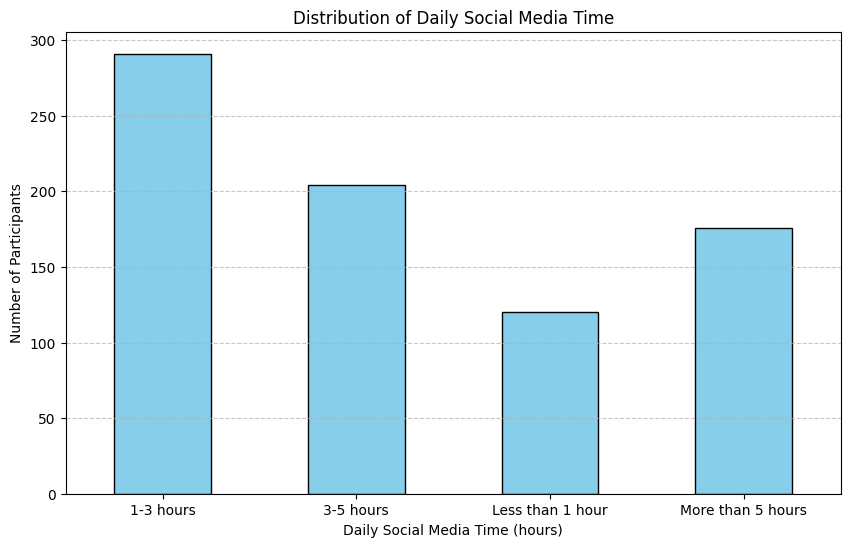

In [10]:
# For Starters, let's understand the distribution of data for 791 participants and their time spent on Social media
data['Daily Social Media Time'].value_counts().sort_index().plot.bar(rot=0, color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Daily Social Media Time')
plt.xlabel('Daily Social Media Time (hours)')
plt.ylabel('Number of Participants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

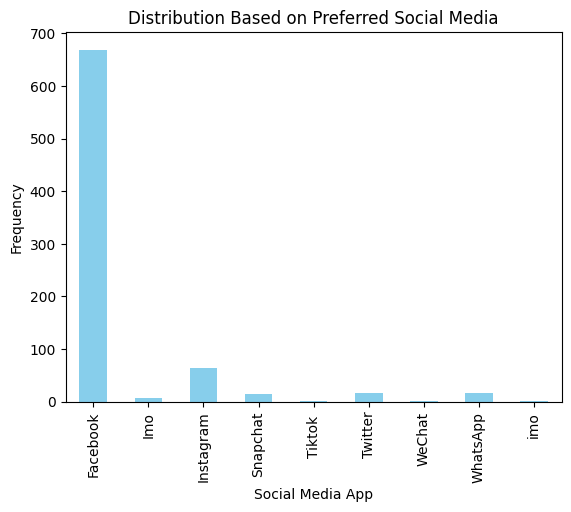

In [11]:
# Let's understand the distribution of data for participants based on the social media app they use.
data.groupby('Preferred Social Media').size().plot(kind='bar', color='skyblue')
plt.title('Distribution Based on Preferred Social Media')
plt.xlabel('Social Media App')
plt.ylabel('Frequency')
plt.show()

## **Step 5: Predictive Analysis**

**Scoring Psychometric Analysis**

In [12]:
# Mapping values to the answers
data['Peer Pressure Due to Social Media'] = data['Peer Pressure Due to Social Media'].map({'No': 0, 'Yes': 1})
data['Emotional Influence by Others\' Posts'] = data['Emotional Influence by Others\' Posts'].map({'Sometimes': 1, 'Always': 2, 'Not at all': 0})
data['Comparison with Others\' Success or Luxurious Life'] = data['Comparison with Others\' Success or Luxurious Life'].map({'Most of the times': 1, 'All the times': 2, 'Never': 0})
data['Impact of Social Media on Mental Wellbeing'] = data['Impact of Social Media on Mental Wellbeing'].map({'Yes': 1, 'No': 0})

# Mapping sleep questions to numerical values
sleep_mapping = {
    'Before 10.00 PM': 0, '10.01 PM to 12.00 AM': 1, '12.01 AM to 2.00 AM': 2, 'After 2.00 AM': 3,
    'Less than 15 minutes': 0, '15-30 minutes': 1, '31-60 minutes': 2, 'More than 60 minutes': 3,
    'Before 5.00 AM': 0, '5.00 AM to 7.00 AM': 1, '7.01 AM to 9.00 AM': 2, 'After 9.00 AM': 3,
    'Less than 4 hours': 0, '4-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3,
    'Less than 5 hours': 0, '5-7 hours': 1, '8-10 hours': 2, 'More than 10 hours': 3,
    'Not during last month': 0, 'Less then once a week': 1, 'Once or twice a week': 2, 'Three or more in week': 3,
    'Very good': 0, 'Farely good': 1, 'Farely bad': 2, 'Very bad': 3
}

# Specify the sleep-related columns you want to visualize
sleep_columns = [
    'Usual Bedtime', 'Sleep Onset Time', 'Usual Wake-Up Time', 'Hours of Sleep per Night', 'Hours in Bed',
    'Difficulty Falling Asleep (Last 30 Days)', 'Night Wakings (Last 30 Days)', 'Bathroom Visits (Last 30 Days)',
    'Breathing Difficulties (Last 30 Days)', 'Loud Coughing or Snoring (Last 30 Days)', 'Feeling Too Cold (Last 30 Days)',
    'Feeling Too Hot (Last 30 Days)', 'Frequency of Bad Dreams (Last 30 Days)', 'Sleep-Related Pain Frequency (Last 30 Days)',
    'Other Sleep Troubles (Last 30 Days)', 'Medication for Sleep (Last 30 Days)',
    'Sleep Disturbances Due to Events (Last 30 Days)', 'Problems Maintaining Routine (Last 30 Days)',
    'Overall Sleep Quality (Last 30 Days)'
]

# Applying mapping to selected sleep-related columns
data[sleep_columns] = data[sleep_columns].applymap(lambda x: sleep_mapping.get(x, x))

# UCLA Loneliness Scale-8 (UCLA-8)
ucla_questions = ['Lack of Companionship (Last 30 Days)', 'No One to Turn to (Last 30 Days)',
                  'Feeling Left Out (Last 30 Days)', 'Feeling Isolated (Last 30 Days)',
                  'Unhappy Withdrawal (Last 30 Days)', 'People Around But Not With Me (Last 30 Days)',
                  'Outgoing Personality (Last 30 Days)', 'Finding Companionship (Last 30 Days)']
data['UCLA_Score'] = data[ucla_questions].astype(int).sum(axis=1)

# Patient Health Questionnaire-9 (PHQ-9)
phq_questions = ['Little Interest or Pleasure (Last 30 Days)', 'Feeling Down or Hopeless (Last 30 Days)',
                 'Sleep Troubles (Last 30 Days)', 'Fatigue (Last 30 Days)', 'Appetite Changes (Last 30 Days)',
                 'Feeling Bad or Failure (Last 30 Days)', 'Concentration Troubles (Last 30 Days)',
                 'Psychomotor Changes (Last 30 Days)', 'Suicidal Thoughts (Last 30 Days)']
data['PHQ_Score'] = data[phq_questions].astype(int).sum(axis=1)

# Generalized Anxiety Disorder-7 (GAD-7) Scale
gad_questions = ['Nervous or Anxious Feelings (Last 30 Days)', 'Difficulty Controlling Worrying (Last 30 Days)',
                 'Excessive Worrying (Last 30 Days)', 'Trouble Relaxing (Last 30 Days)', 'Restlessness (Last 30 Days)',
                 'Irritability (Last 30 Days)', 'Fearful Feelings (Last 30 Days)']
data['GAD_Score'] = data[gad_questions].astype(int).sum(axis=1)

# Pittsburgh Sleep Quality Index (PSQI)
psqi_questions = ['Difficulty Falling Asleep (Last 30 Days)', 'Night Wakings (Last 30 Days)',
                  'Bathroom Visits (Last 30 Days)', 'Breathing Difficulties (Last 30 Days)',
                  'Loud Coughing or Snoring (Last 30 Days)', 'Feeling Too Cold (Last 30 Days)',
                  'Feeling Too Hot (Last 30 Days)', 'Frequency of Bad Dreams (Last 30 Days)',
                  'Sleep-Related Pain Frequency (Last 30 Days)', 'Other Sleep Troubles (Last 30 Days)',
                  'Medication for Sleep (Last 30 Days)', 'Sleep Disturbances Due to Events (Last 30 Days)',
                  'Problems Maintaining Routine (Last 30 Days)', 'Overall Sleep Quality (Last 30 Days)']
data['PSQI_Score'] = data[psqi_questions].astype(int).sum(axis=1)

**Each Score visualised against Daily Time spent on Social MEdia**

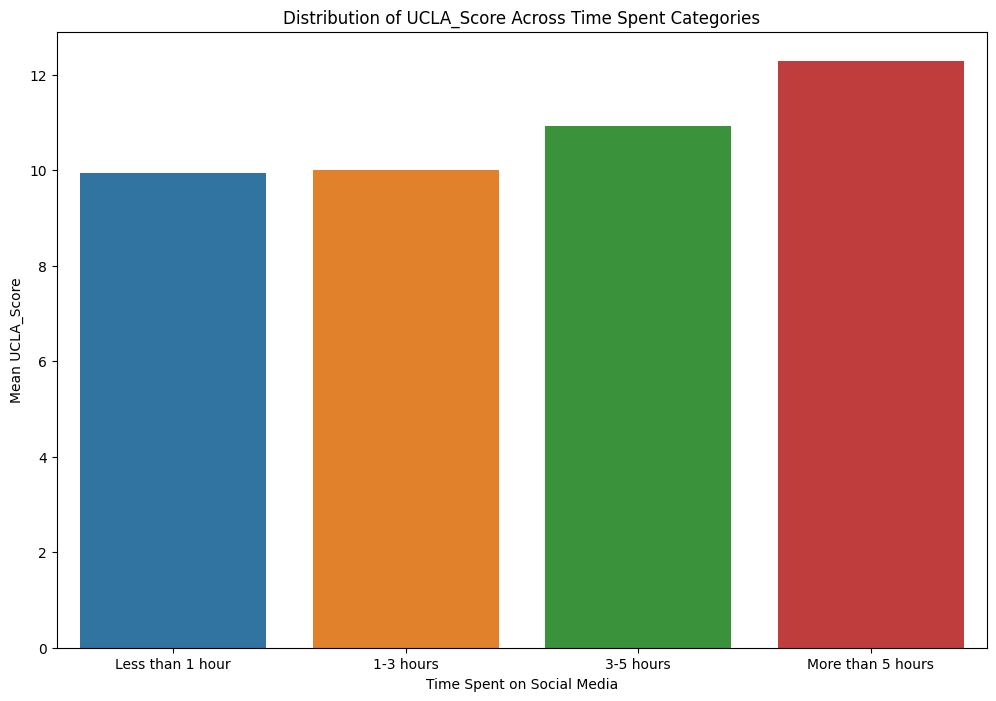

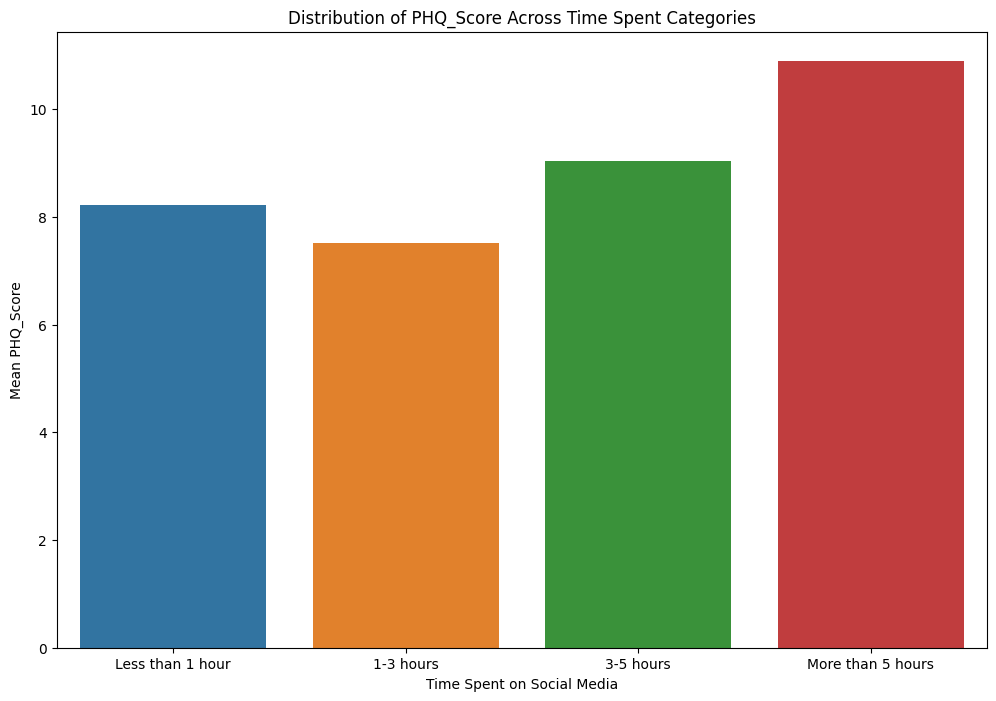

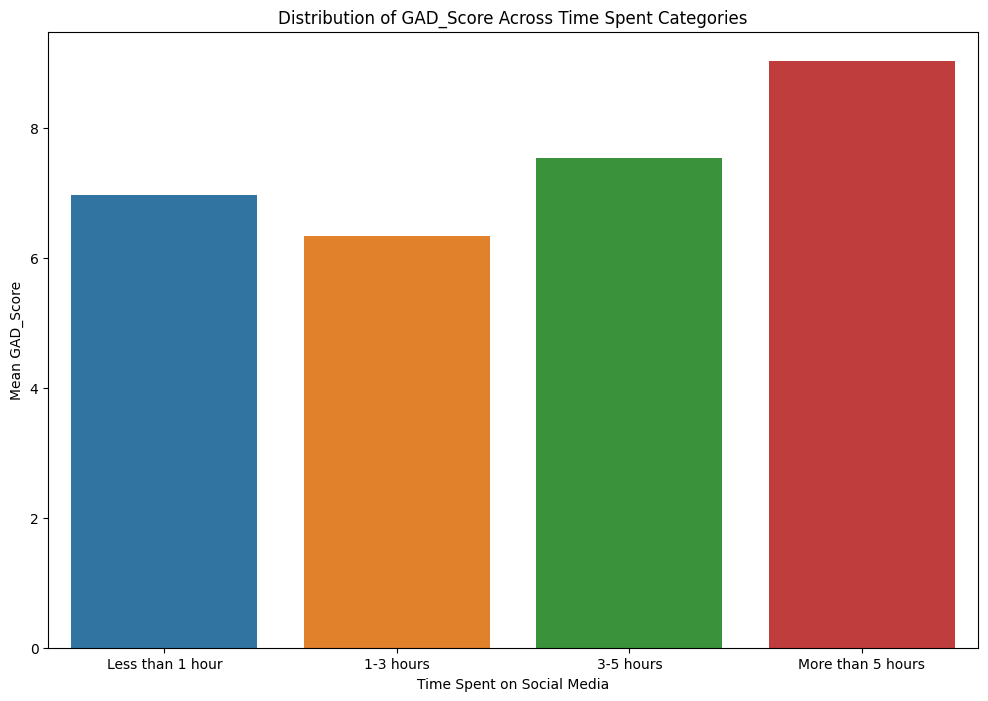

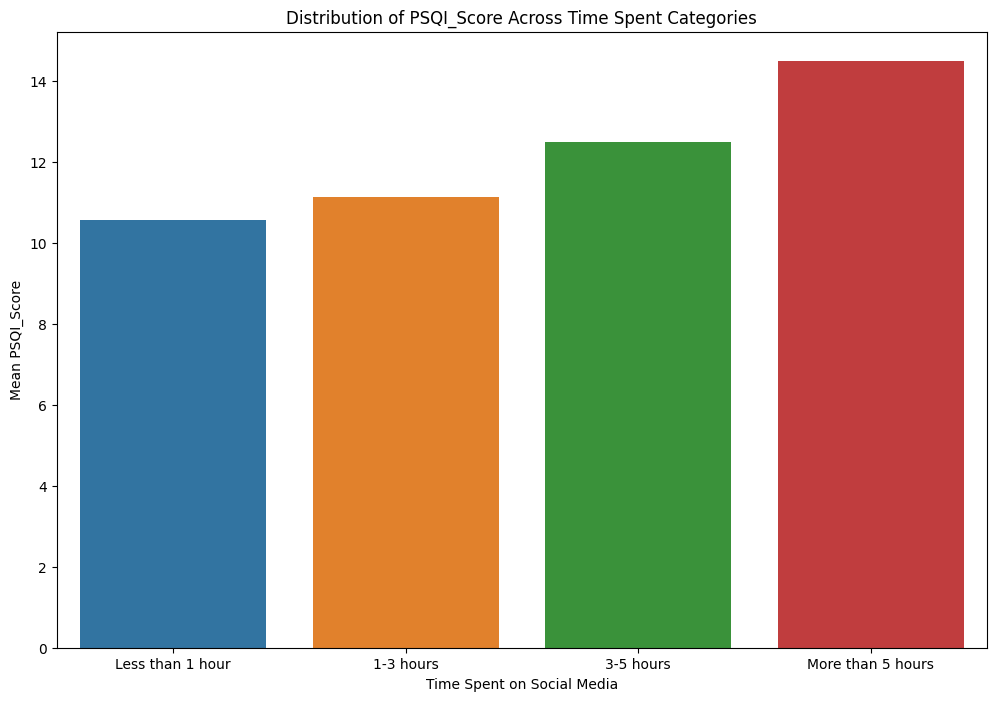

In [13]:
# Define the score columns
score_columns = ['UCLA_Score', 'PHQ_Score', 'GAD_Score', 'PSQI_Score']

# Define the order of categories
time_spent_order = ['Less than 1 hour', '1-3 hours', '3-5 hours', 'More than 5 hours']

# Plotting for each score with the specified order
for score_column in score_columns:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Daily Social Media Time', y=score_column, data=data, errorbar=None, order=time_spent_order)
    plt.title(f'Distribution of {score_column} Across Time Spent Categories')
    plt.xlabel('Time Spent on Social Media')
    plt.ylabel(f'Mean {score_column}')
    plt.show()


**Converting Time Spent category to Numerical Values**


Before attempting to look at the corresponding heatmap/correlation matrix of our dataset, let us convert the 'Time Spent" column from string to integer. We will also give the Gender variable numerical values so that they can be used in the correlation plots, heatmaps and machine learning.

In [14]:
data['Daily Social Media Time'] = data['Daily Social Media Time'].map({'Less 1 hour': 0, '1-3 hours': 1, '3-5 hours': 2, 'More than 5 hours': 3})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [15]:
data.head()

,Timestamp,Social Media Account,Preferred Social Media,Device Used for Social Media,Internet Connection Type,Years on Social Media,Post Frequency,Daily Social Media Time,Preferred Social Media Time,Number of Friends on Social Media,...,Sleep-Related Pain Frequency (Last 30 Days),Other Sleep Troubles (Last 30 Days),Medication for Sleep (Last 30 Days),Sleep Disturbances Due to Events (Last 30 Days),Problems Maintaining Routine (Last 30 Days),Overall Sleep Quality (Last 30 Days),UCLA_Score,PHQ_Score,GAD_Score,PSQI_Score
0,2021-02-20 21:56:49.755,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,1.0,Frequently at anytime,Less than 500,...,0,1,0,1,1,1,5,6,6,8
1,2021-02-20 23:32:52.030,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,3-5 per day,3.0,Frequently at anytime,500-2000,...,0,0,1,1,1,3,16,8,11,19
2,2021-02-16 21:03:59.071,Yes,Facebook,Mobile Phone,Broadband (Wi-Fi),5-10 years,Less than 1 per day,2.0,Night to late night,Less than 500,...,3,3,0,3,2,3,20,5,19,24
3,2021-03-01 10:03:23.049,Yes,Twitter,Mobile Phone,Mobile data,Less than 2-year,Less than 1 per day,2.0,Frequently at anytime,500-2000,...,0,0,0,0,0,1,11,2,0,1
4,2021-02-27 19:27:54.278,Yes,Twitter,Mobile Phone,Broadband (Wi-Fi),Less than 2-year,More than 5 per day,3.0,Night to late night,2000-4000,...,1,1,1,1,1,1,9,19,15,6


**Correlation Plot and Heatmap**

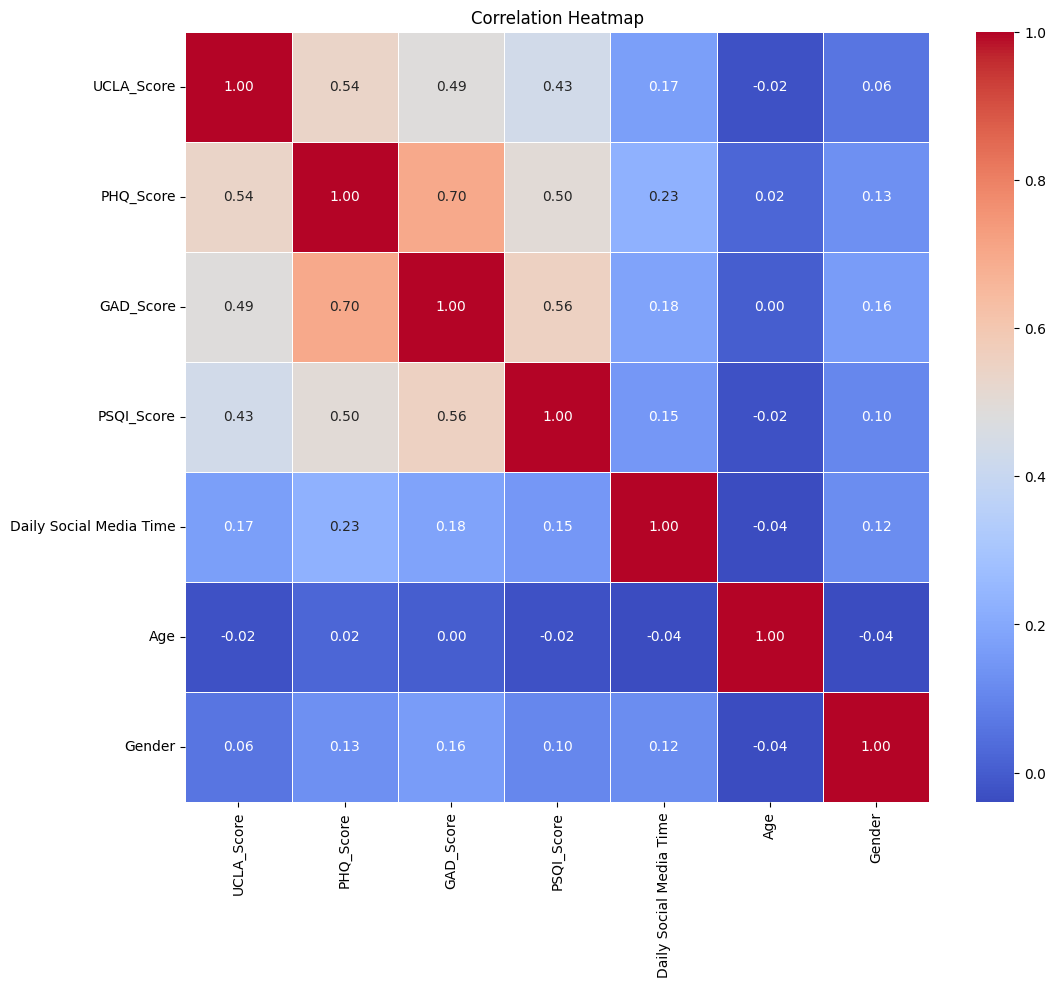

In [16]:
variables_of_interest = ['UCLA_Score', 'PHQ_Score', 'GAD_Score', 'PSQI_Score', 'Daily Social Media Time', 'Age', 'Gender']
correlation_data = data[variables_of_interest]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## **Step 6: Predective Modelling**

**Adding an Outcome model**

In [17]:
# Adding Total Score column
data['Total_Score'] = data['UCLA_Score'] + data['PHQ_Score'] + data['GAD_Score'] + data['PSQI_Score']

def map_outcome(score):
    if score < 100:
        return 0
    elif score >= 100:
        return 1

data['Outcome'] = data['Total_Score'].apply(map_outcome)

In [18]:
# Handling missing data
data.dropna(inplace=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
features = data[['Daily Social Media Time']]
outcome = data['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.9850746268656716


In [22]:
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[132   0]
 [  2   0]]


In [23]:
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       132
           1       0.00      0.00      0.00         2

    accuracy                           0.99       134
   macro avg       0.49      0.50      0.50       134
weighted avg       0.97      0.99      0.98       134

